# Self Organizing Maps

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('/content/sample_data/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [20]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

---
# SimpSOM

In [32]:
pip install SimpSOM==1.3.4


  Using cached SimpSOM-1.3.4-py3-none-any.whl
  Attempting uninstall: SimpSOM
    Found existing installation: SimpSOM 1.3.2
    Uninstalling SimpSOM-1.3.2:
      Successfully uninstalled SimpSOM-1.3.2


Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


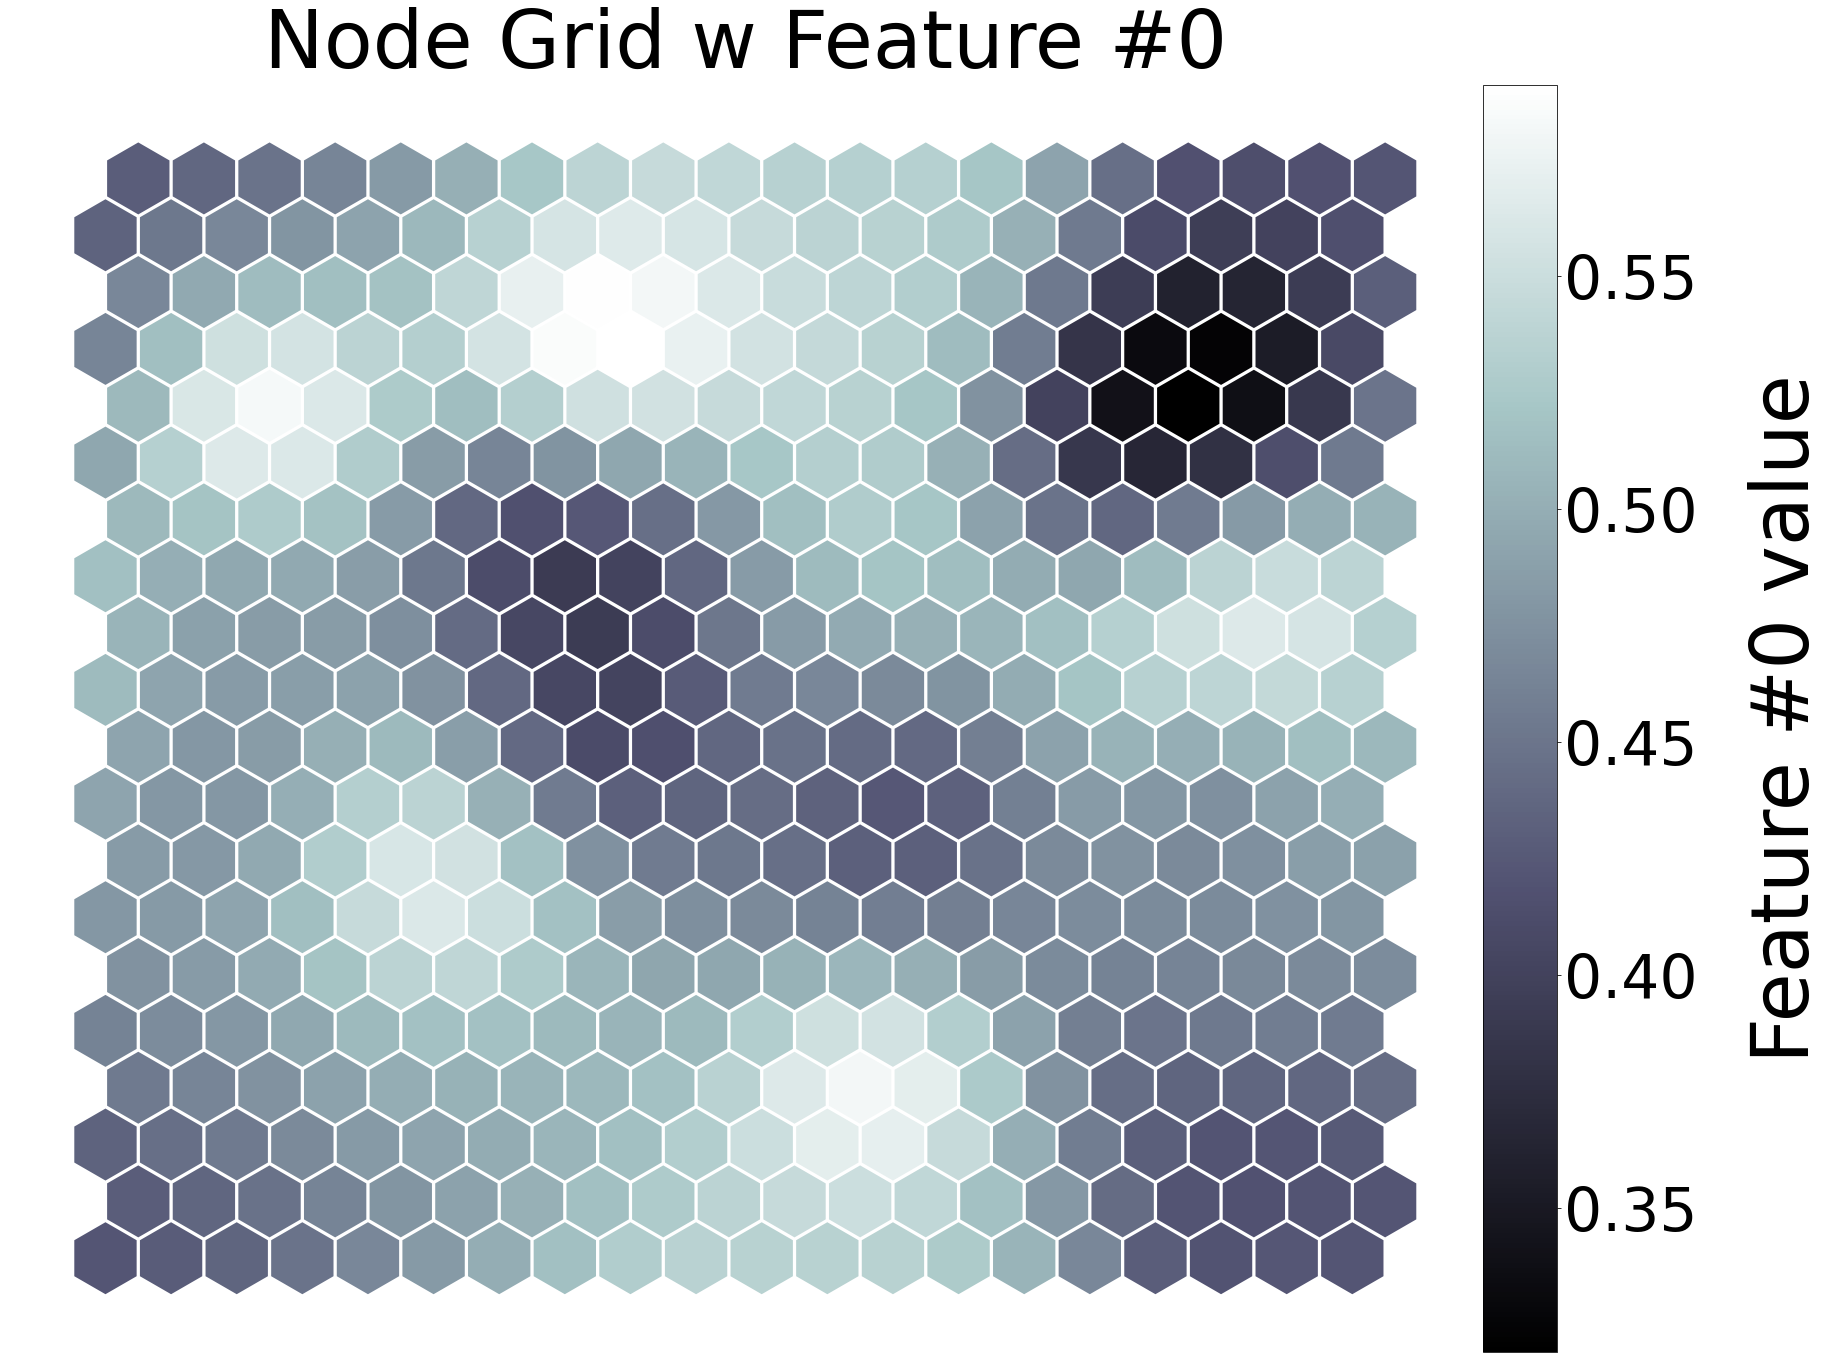

In [44]:
import pandas as pd
import  SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.somNet(20, 20, X, PBC=True)
net.train(0.1, 1000)
net.save('filename_weights')
net.nodes_graph(colnum=0)

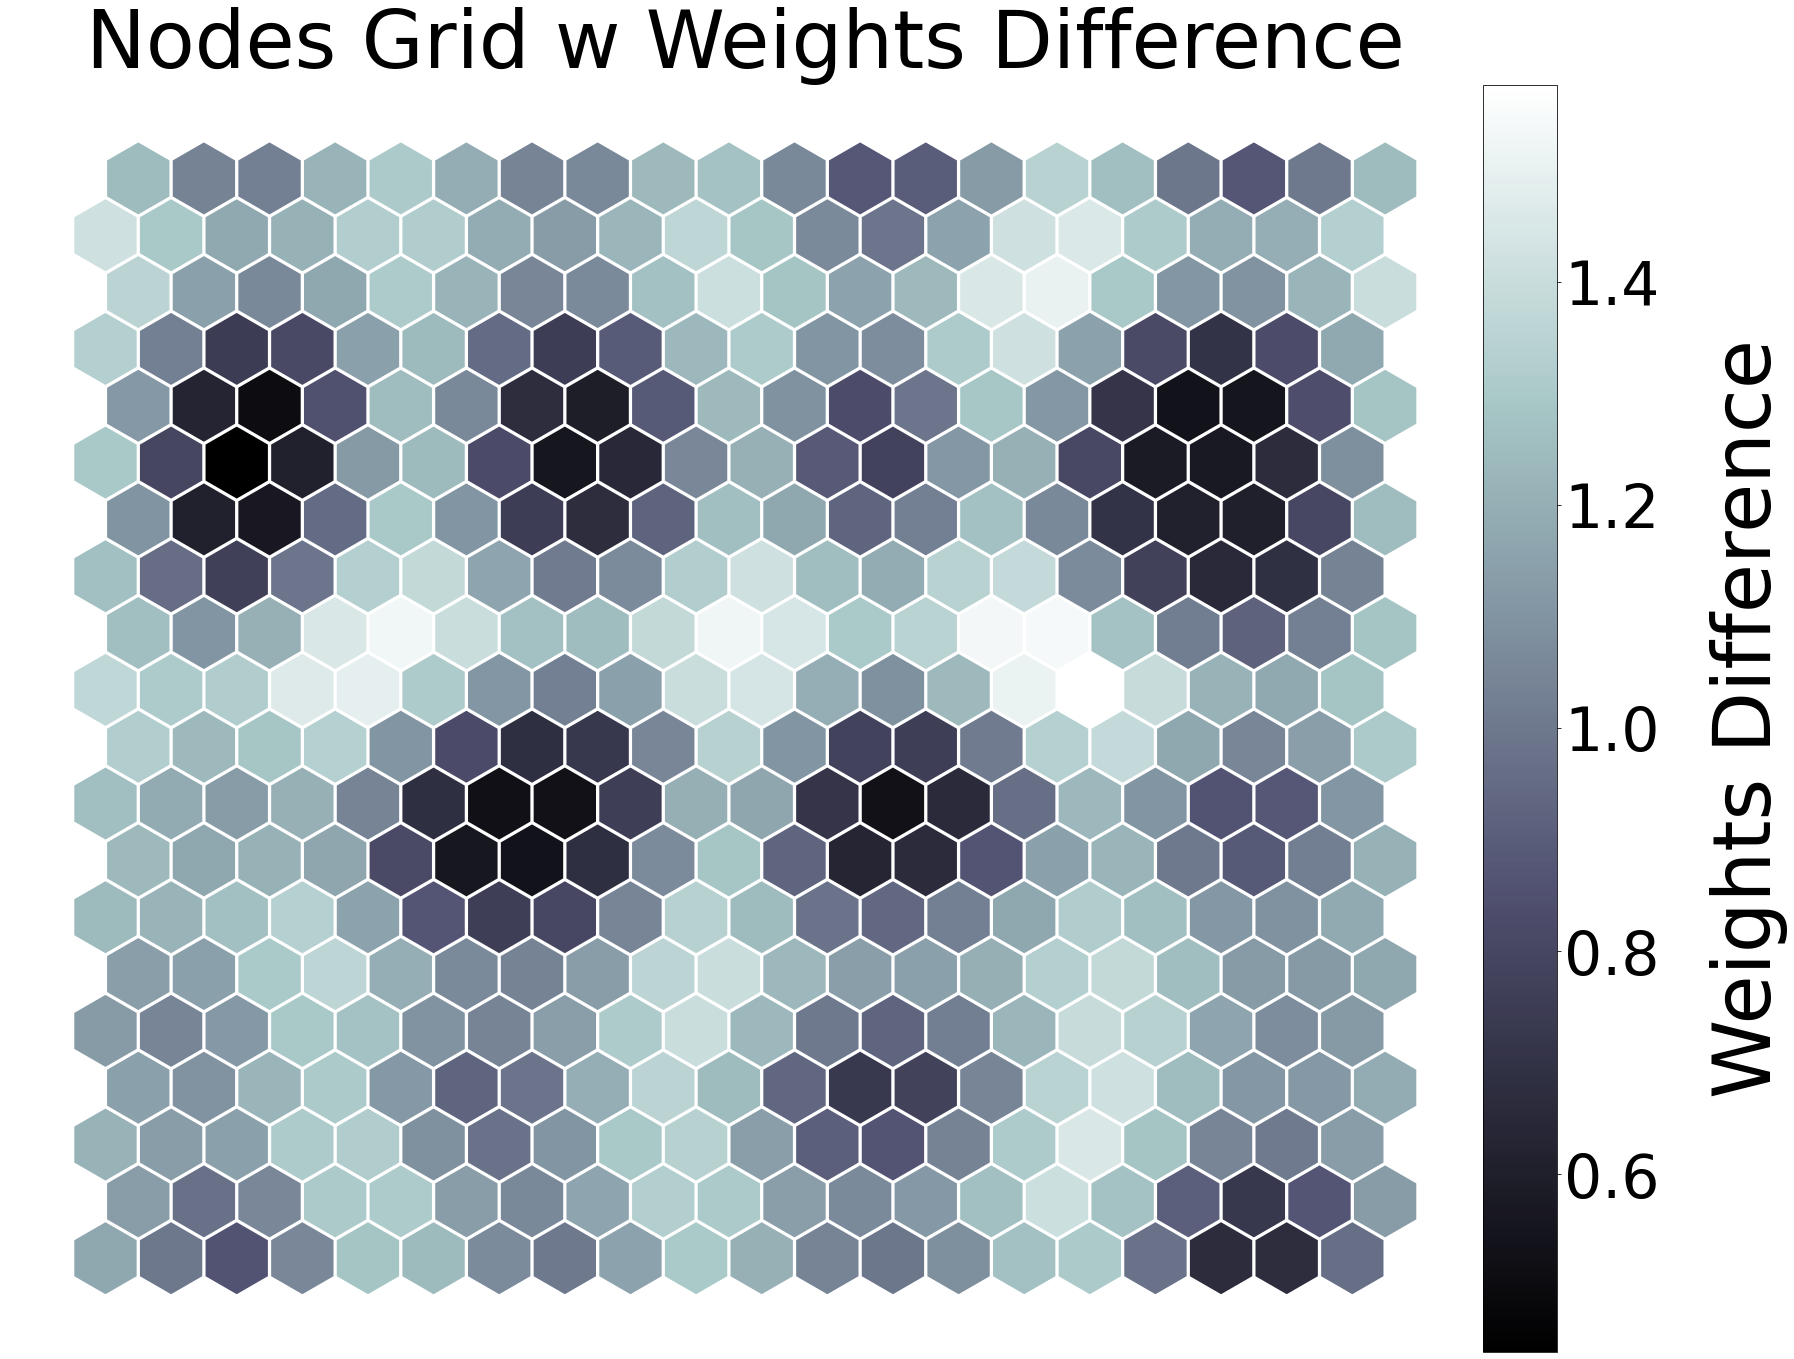

In [45]:
net.diff_graph()

## Projecting the data points on the new 2D network map ##

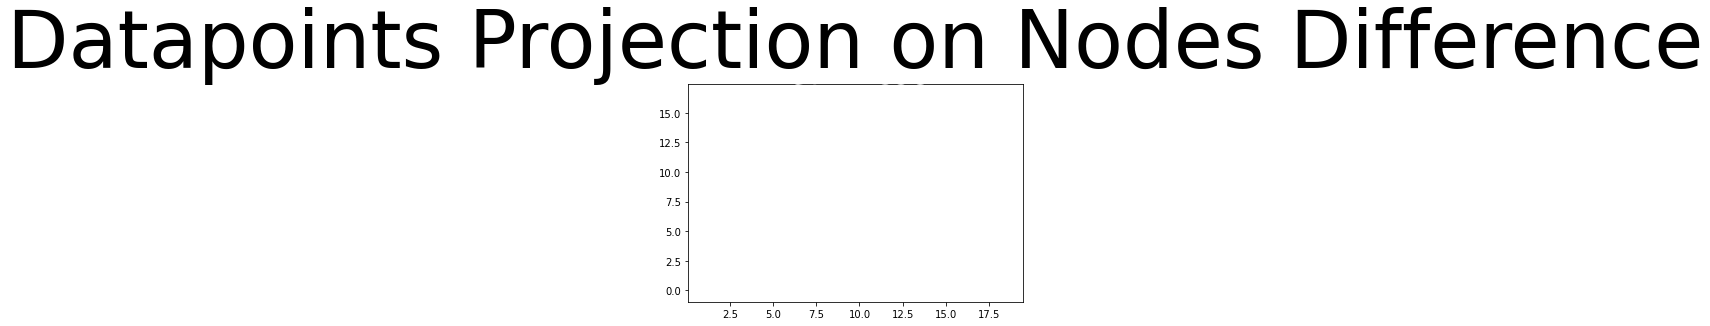

<Figure size 432x288 with 0 Axes>

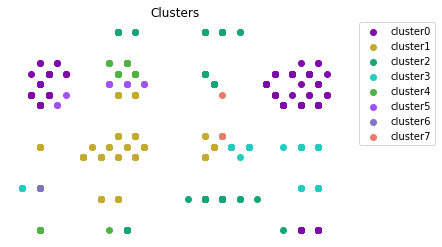

A image acima apresenta os casos com decisões que divergem dos vizinhos


<Figure size 432x288 with 0 Axes>

In [65]:
net.project(X, show = True) #Issue: net.project is generating a blank image
#Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(X, type='qthresh',show = True)
print("A imagem acima apresenta os casos com decisões que divergem dos vizinhos")

In [74]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)
dataset["clusters"]=kmeans.labels_

# Where "Class" and "clusters" is 0, the card was correctly denied
print("Operações que foram determinadas como fraudes e negadas")
dataset[(dataset["clusters"]==0) & (dataset["Class"] == 0)]

Operações que foram determinadas como fraudes e negadas


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class,clusters
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,0,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0,0
10,15644446,1,33.50,1.750,2,14,8,4.500,1,1,4,1,2,253,858,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,15699294,1,24.42,12.335,2,11,8,1.585,1,0,0,1,2,120,1,0,0
675,15660871,1,26.17,12.500,1,4,8,1.250,0,0,0,1,2,0,18,0,0
677,15722535,1,23.00,0.750,2,7,4,0.500,1,0,0,1,1,320,1,0,0
678,15711977,1,25.67,0.290,1,8,4,1.500,0,0,0,1,2,160,1,0,0


[[0.4220525322596231, 0.1969105230957447, 0.2602142339382042, 0.12883371285379738, 0.3456621321792159, 0.33977542550224804, 0.3353734707427724, 0.03568936589228558, 0.05209206068568701, 0.1290897949299168, 0.005178363887889749, 0.4826467024287092, 0.42907848513011326, 0.09389583728099986, 0.0028322855953325015], [0.428847155051715, 0.15488339047967706, 0.25796600339709586, 0.12231409611729549, 0.3628227067407976, 0.35348670107089153, 0.34017399261801545, 0.0421199885542264, 0.07723895744808743, 0.23308534645756188, 0.010123143571729918, 0.6167559019268707, 0.4289169752811706, 0.10267905043856601, 0.00247148089554407], [0.4343394436516456, 0.1455850735727335, 0.24386211913632613, 0.11940528230989161, 0.3739616305214497, 0.3455587841393924, 0.32982458471586495, 0.03901514699291827, 0.08596344126042708, 0.36103175871000853, 0.015413240575586344, 0.5181391861309116, 0.44920656077181237, 0.11556548483546338, 0.002864262558375598], [0.4543479219159104, 0.16780573525628548, 0.2310670482364387